## Pfizer Vaccine Tweet Analysis

* Exploratory Data Analysis
* Sentiment Analysis
* Word Embedding Analysis

In [1]:
# import libraries
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
# import utils
from utils.plot_utils import *

C:\Users\asfiy\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataset = pd.read_csv('../data/vaccination_tweets.csv')
print('columns: ', dataset.columns)

columns:  Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')


### Exploratory Data Analysis

* Most common hashtags
* Users with largest number of followers
* Locations with largest number of tweets
* Analysis of tweets over time

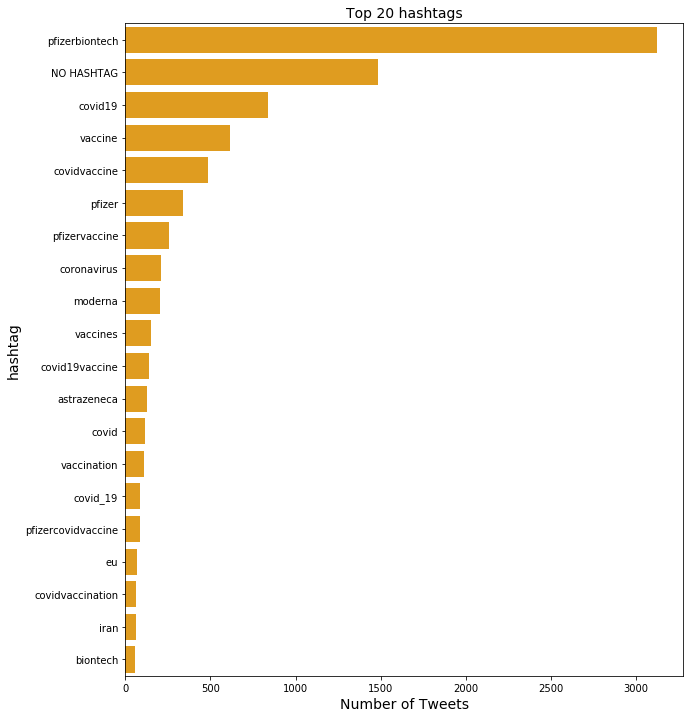

In [3]:
# clean hashtag data and add to a new dataframe
def split_hashtags(x): 
    return str(x).replace('[', '').replace(']', '').split(',')

dataset_hashtags = dataset.copy()
dataset_hashtags['hashtag'] = dataset_hashtags['hashtags'].apply(lambda row : split_hashtags(row))
dataset_hashtags = dataset_hashtags.explode('hashtag')
dataset_hashtags['hashtag'] = dataset_hashtags['hashtag'].astype(str).str.lower().str.replace("'", '').str.replace(" ", '')
dataset_hashtags.loc[dataset_hashtags['hashtag']=='nan', 'hashtag'] = 'NO HASHTAG'
    
# plot top 20 most used hashtags
plot_count('hashtag', 'Top 20 hashtags', 'hashtag', 'Number of Tweets', dataset_hashtags, num_show=20, horizontal = True)

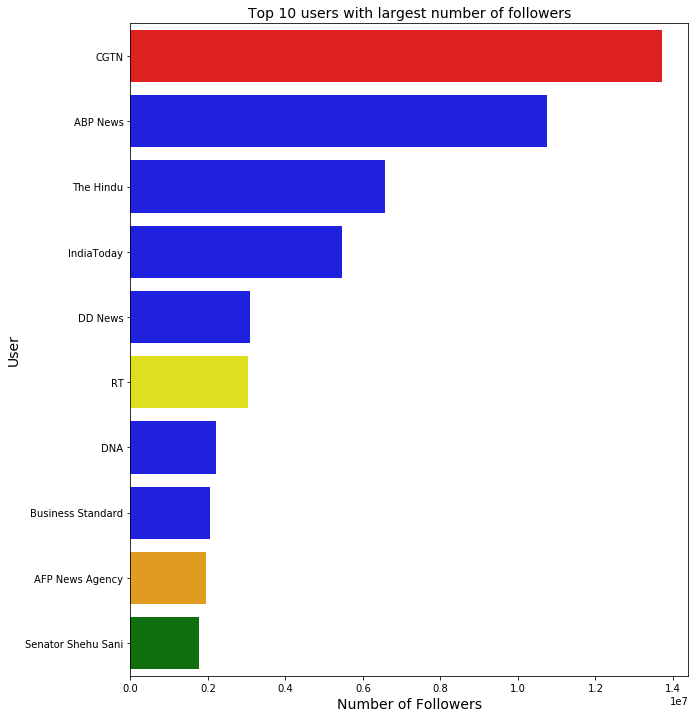

In [4]:
# plot top 10 users with largest number of followers
dataset_users = dataset.copy()
plot_by_feature('user_followers', 'Top 10 users with largest number of followers', 'User', 'Number of Followers', dataset_users, num_show=10, horizontal=True)

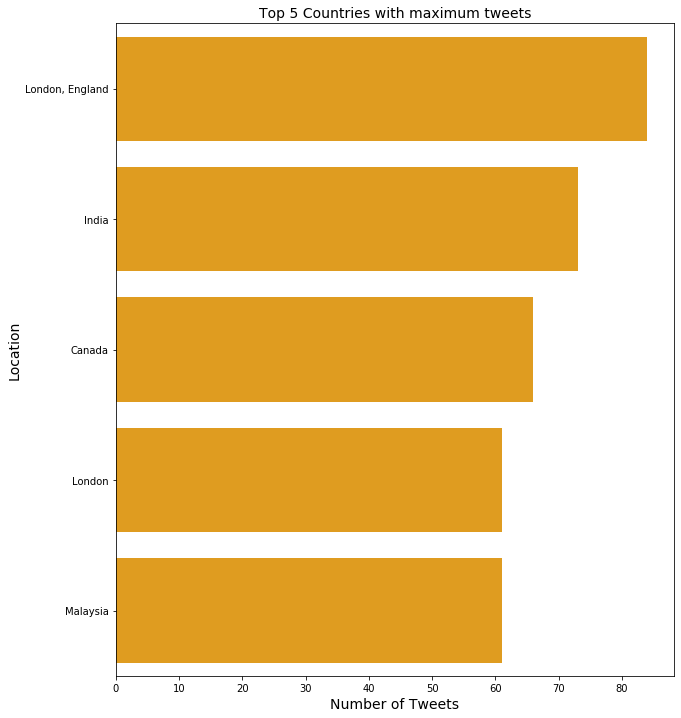

In [5]:
# Locations with largest number of tweets
dataset_countries = dataset.copy()
plot_count('user_location', 'Top 5 Countries with maximum tweets', 'Location', 'Number of Tweets', dataset_countries, num_show=5, horizontal=True)

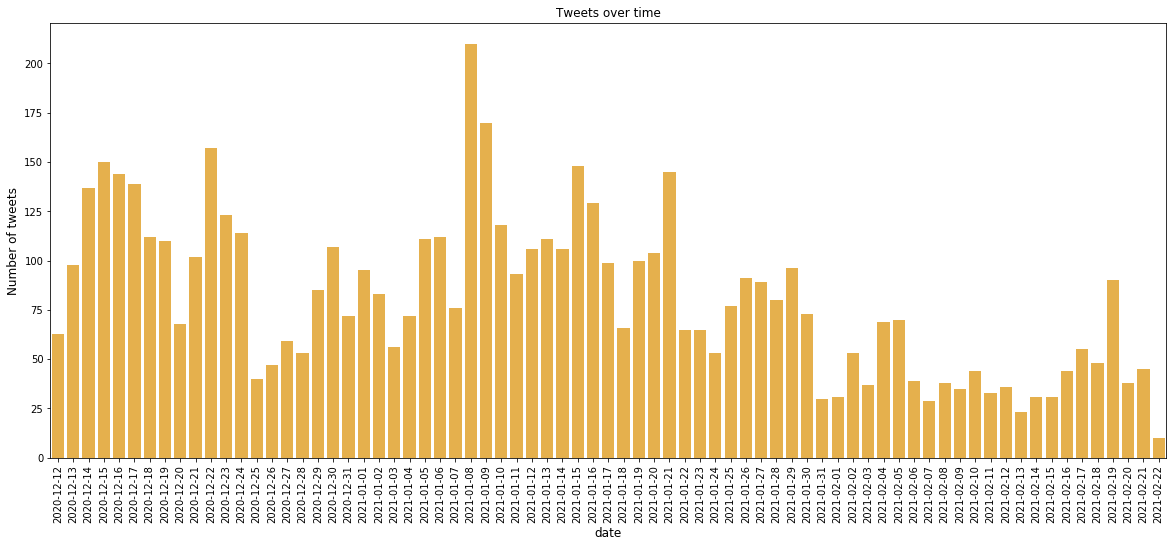

In [6]:
# Analysis of tweets over time
dataset_date = dataset.copy()
plot_over_time(dataset_date, 'date')

### Textblob Sentiment Analysis

* Enter contents here 

### Word Embedding Analysis

* Enter contents here 